# Redis YCSB

Let's see what influence other workloads have on Redis YCSB.

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

## Redis YCSB 12x20min

In [2]:
experiment_name = 'redis_ycsb_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606626773,0.059201,15423.107242,0.000065,1304.0,1.463669e+10,1.0
1,1606626837,0.058712,15429.188596,0.000065,1285.0,1.403681e+10,1.0
2,1606626901,0.058027,15491.066818,0.000065,1281.0,1.401955e+10,1.0
3,1606626965,0.059132,15455.685116,0.000065,1297.0,1.402157e+10,1.0
4,1606627029,0.058956,15479.077447,0.000065,1301.0,1.400061e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     7738.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          2.00e-162
Time:                        13:46:24   Log-Likelihood:                 1005.3
No. Observations:                 203   AIC:                            -2007.
Df Residuals:                     201   BIC:                            -2000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0575      0.000    237.516      

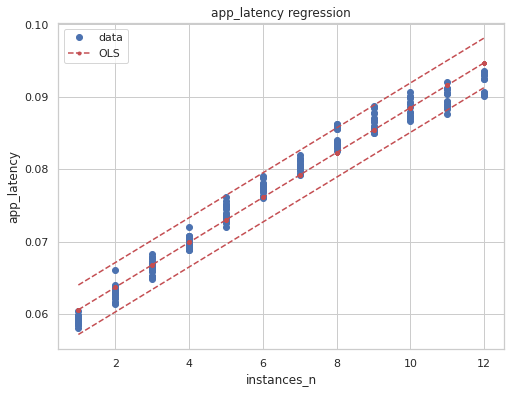

In [3]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Redis YCSB 1x20min, Linpack 11x20min

In [4]:
experiment_name = 'redis_ycsb_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606710113,0.058623,15549.681232,0.000064,1327.0,1.490575e+10,1.0
1,1606710178,0.059653,15330.369462,0.000065,1306.0,1.489347e+10,1.0
2,1606710242,0.059539,15356.789407,0.000065,1304.0,1.431170e+10,1.0
3,1606710307,0.058976,15436.598460,0.000065,1347.0,1.431282e+10,1.0
4,1606710371,0.059753,15263.032934,0.000066,1328.0,1.429867e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3313.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          5.93e-113
Time:                        13:46:24   Log-Likelihood:                 734.23
No. Observations:                 171   AIC:                            -1464.
Df Residuals:                     169   BIC:                            -1458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0554      0.000    110.968      

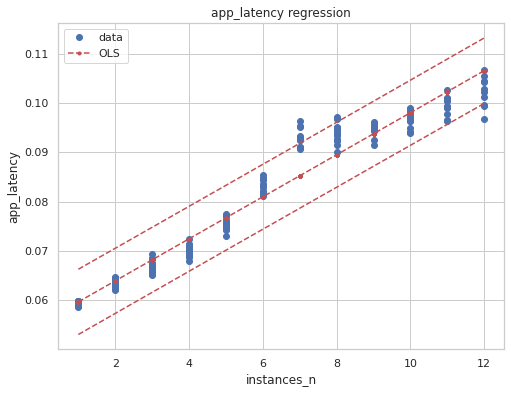

In [5]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Redis YCSB 1x20min, Hadoop 9x20min

In [6]:
experiment_name = 'redis_ycsb_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606834529,0.060692,15071.842449,0.000066,1317.0,1.417361e+10,1.0
1,1606834593,0.058703,15498.803148,0.000065,1314.0,1.416831e+10,1.0
2,1606834658,0.059504,15245.968288,0.000066,1291.0,1.416469e+10,1.0
3,1606834723,0.059264,15253.461688,0.000066,1319.0,1.412812e+10,1.0
4,1606834788,0.059951,15190.898964,0.000066,1301.0,1.413435e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1204.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           7.23e-95
Time:                        13:46:25   Log-Likelihood:                 994.62
No. Observations:                 239   AIC:                            -1985.
Df Residuals:                     237   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0629      0.001    123.264      

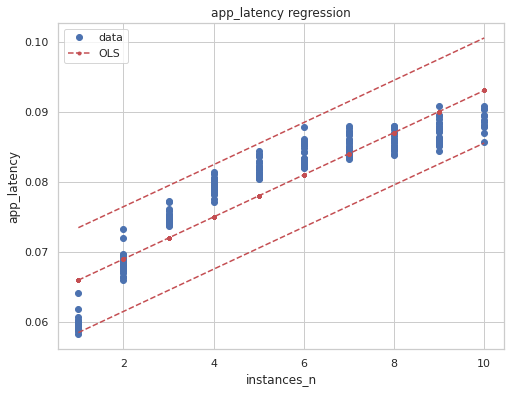

In [7]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

## Redis YCSB 1x20min, Sysbench 11x20min

In [8]:
experiment_name = 'redis_ycsb_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606856301,0.059566,15326.975477,0.000065,1288.0,1.425650e+10,1.0
1,1606856366,0.058988,15316.281207,0.000065,1290.0,1.421158e+10,1.0
2,1606856431,0.059317,15353.383715,0.000065,1292.0,1.419672e+10,1.0
3,1606856496,0.059989,15130.373384,0.000066,1341.0,1.418966e+10,1.0
4,1606856560,0.059169,15431.569562,0.000065,1308.0,1.417754e+10,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     2544.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.10e-133
Time:                        13:46:26   Log-Likelihood:                 1359.2
No. Observations:                 254   AIC:                            -2714.
Df Residuals:                     252   BIC:                            -2707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0593      0.000    385.320      

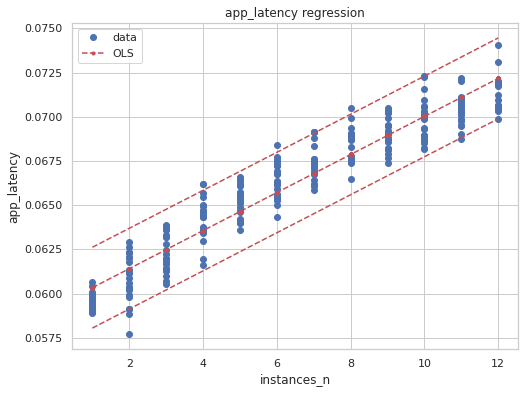

In [9]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())